In [117]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

import internal_ref as ref


In [118]:
CDC = ref.Home + '/df_final.csv'
labor = ref.Home + '/labor.csv'
hi = ref.Home + '/HI.csv'

df_CDC = pd.read_csv(CDC, dtype={'County Code' : int})
df_labor = pd.read_csv(labor, dtype={'series_id' : str, 
                                     'year' : int, 
                                     'period' : str, 
                                     'value' : object,
                                     'footnote_codes' : str,
                                     'area_code': str,
                                     'series_title' : str,
                                     'area_text' : str})
df_hi = pd.read_csv(hi)

/Users/allandong/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [119]:
df_CDC.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Notes'], axis =1, inplace=True)
# df_labor.drop(['Unnamed: 0'], axis=1, inplace=True)
# df_hi.drop('Unnamed: 0', axis=1, inplace=True)

In [148]:
cdcColumns = ['County', 'County_Code', 'Race', 'Race_Code',
       'ICD_10_130_Infants',
       'ICD_10_130_Infants_Code', 'Cause_of_death',
       'Cause_of_death_Code', 'Gender', 'Gender_Code', 'Deaths', 'Births',
       'Death_Rate', 'Year']
df_CDC.columns = cdcColumns

# CDC exploration

In [121]:
df_CDC.head(3)

,County,County_Code,Race,Race_Code,ICD_10_130_(Infants),ICD_10_130_(Infants)_Code,Cause_of_death,Cause_of_death_Code,Gender,Gender_Code,Deaths,Births,Death_Rate,Year
0,"Jefferson County, AL",1073,Black or African American,2054-5,Certain conditions originating in the perinata...,GR130-070,Extreme immaturity,P07.2,Female,F,10.0,2184.0,4.58 (Unreliable),1999
1,"Jefferson County, AL",1073,Black or African American,2054-5,Disorders related to length of gestation and f...,GR130-086,Extreme immaturity,P07.2,Female,F,10.0,2184.0,4.58 (Unreliable),1999
2,"Jefferson County, AL",1073,Black or African American,2054-5,#Disorders related to short gestation and low ...,GR130-088,Extreme immaturity,P07.2,Female,F,10.0,2184.0,4.58 (Unreliable),1999


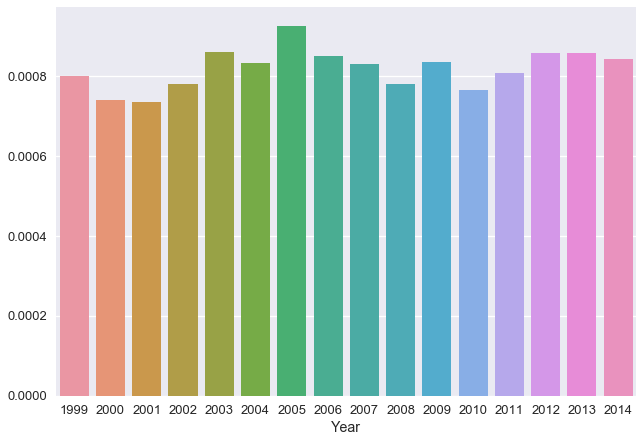

In [122]:
x = df_CDC.groupby(['Year']).sum().Deaths
y = df_CDC.groupby(['Year']).sum().Births
z = x/y
year =z.index
ratio = z.values
sns.set_context('talk')
sns.barplot(year, ratio)

In [123]:
len(df_CDC.groupby('County'))

93

In [124]:
len(df_CDC)

8075

In [125]:
8075/93

86.82795698924731

In [126]:
86/12

7.166666666666667

In [1]:
# for year in range(1999, 2015):
#     print(year)
#     print(df_CDC[df_CDC.Year == year].iloc[:,6].value_counts())
#     print('\n')

# Labor Analysis

In [128]:
df_labor[df_labor.area_text.str.find(r'North Little Rock') != -1]

,series_id,year,period,unemployment_rate,footnote_codes,area_code,series_title,area_text
728,LAUCA053400000000003,1999,M01,4.4,,CA0534000000000,Unemployment Rate: Little Rock-North Little Ro...,"Little Rock-North Little Rock, AR Combined Sta..."
729,LAUCA053400000000003,1999,M02,4.2,,CA0534000000000,Unemployment Rate: Little Rock-North Little Ro...,"Little Rock-North Little Rock, AR Combined Sta..."
730,LAUCA053400000000003,1999,M03,3.8,,CA0534000000000,Unemployment Rate: Little Rock-North Little Ro...,"Little Rock-North Little Rock, AR Combined Sta..."
731,LAUCA053400000000003,1999,M04,3.6,,CA0534000000000,Unemployment Rate: Little Rock-North Little Ro...,"Little Rock-North Little Rock, AR Combined Sta..."
732,LAUCA053400000000003,1999,M05,3.7,,CA0534000000000,Unemployment Rate: Little Rock-North Little Ro...,"Little Rock-North Little Rock, AR Combined Sta..."
733,LAUCA053400000000003,1999,M06,4.2,,CA0534000000000,Unemployment Rate: Little Rock-North Little Ro...,"Little Rock-North Little Rock, AR Combined Sta..."
734,LAUCA053400000000003,1999,M07,4.4,,CA0534000000000,Unemployment Rate: Little Rock-North Little Ro...,"Little Rock-North Little Rock, AR Combined Sta..."
735,LAUCA053400000000003,1999,M08,3.9,,CA0534000000000,Unemployment Rate: Little Rock-North Little Ro...,"Little Rock-North Little Rock, AR Combined Sta..."
736,LAUCA053400000000003,1999,M09,3.9,,CA0534000000000,Unemployment Rate: Little Rock-North Little Ro...,"Little Rock-North Little Rock, AR Combined Sta..."
737,LAUCA053400000000003,1999,M10,3.5,,CA0534000000000,Unemployment Rate: Little Rock-North Little Ro...,"Little Rock-North Little Rock, AR Combined Sta..."


In [129]:
df_labor[df_labor.area_text.str.find(r'Little Rock city, AR') != -1][df_labor.period == 'M13']

/Users/allandong/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,series_id,year,period,unemployment_rate,footnote_codes,area_code,series_title,area_text
263132,LAUCT054100000000003,1999,M13,3.5,,CT0541000000000,"Unemployment Rate: Little Rock city, AR (U)","Little Rock city, AR"
263184,LAUCT055045000000003,1999,M13,3.6,,CT0550450000000,"Unemployment Rate: North Little Rock city, AR (U)","North Little Rock city, AR"
1734368,LAUCT054100000000003,2000,M13,3.9,,CT0541000000000,"Unemployment Rate: Little Rock city, AR (U)","Little Rock city, AR"
1734381,LAUCT054100000000003,2001,M13,4.5,,CT0541000000000,"Unemployment Rate: Little Rock city, AR (U)","Little Rock city, AR"
1734394,LAUCT054100000000003,2002,M13,5.2,,CT0541000000000,"Unemployment Rate: Little Rock city, AR (U)","Little Rock city, AR"
1734407,LAUCT054100000000003,2003,M13,5.5,,CT0541000000000,"Unemployment Rate: Little Rock city, AR (U)","Little Rock city, AR"
1734420,LAUCT054100000000003,2004,M13,5.4,,CT0541000000000,"Unemployment Rate: Little Rock city, AR (U)","Little Rock city, AR"
1734628,LAUCT055045000000003,2000,M13,3.6,,CT0550450000000,"Unemployment Rate: North Little Rock city, AR (U)","North Little Rock city, AR"
1734641,LAUCT055045000000003,2001,M13,4.2,,CT0550450000000,"Unemployment Rate: North Little Rock city, AR (U)","North Little Rock city, AR"
1734654,LAUCT055045000000003,2002,M13,4.8,,CT0550450000000,"Unemployment Rate: North Little Rock city, AR (U)","North Little Rock city, AR"


# HI analysis

In [130]:
df_hi.head(3)

,Id,Id2,Geography,Est_total_pop,Est_1_HI_pop,Est_0_HI_pop,Year,HI_ratio
0,0500000US01003,1003,"Baldwin County, Alabama",197501,22613,174888,2014,0.114496
1,0500000US01015,1015,"Calhoun County, Alabama",114583,14036,100547,2014,0.122496
2,0500000US01043,1043,"Cullman County, Alabama",80363,8514,71849,2014,0.105944


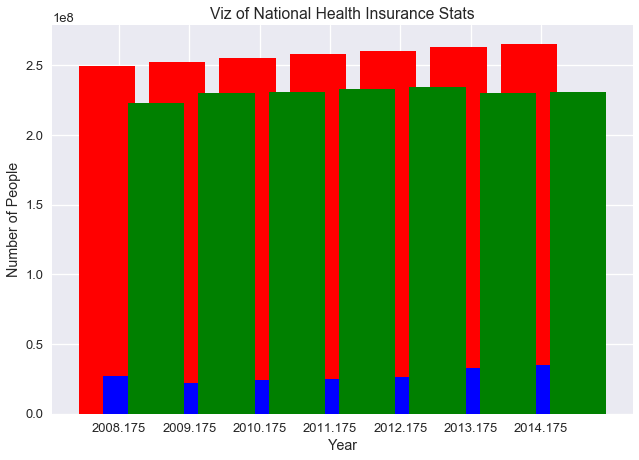

In [131]:
total_pop = df_hi.groupby('Year').sum().Est_total_pop.values
atleastone = df_hi.groupby('Year').sum().Est_1_HI_pop.values
zero = df_hi.groupby('Year').sum().Est_0_HI_pop.values

year = df_hi.groupby('Year').sum().index


width = 0.35

fig, ax = plt.subplots()
ax.bar(year, total_pop, color='r')
ax.bar(year+0.35, atleastone, color='b')
ax.bar(year+0.7, zero, color='g')

ax.set_title('Viz of National Health Insurance Stats')
ax.set_xlabel('Year')
ax.set_ylabel('Number of People')
ax.set_xticks(year + width/2)


plt.show()




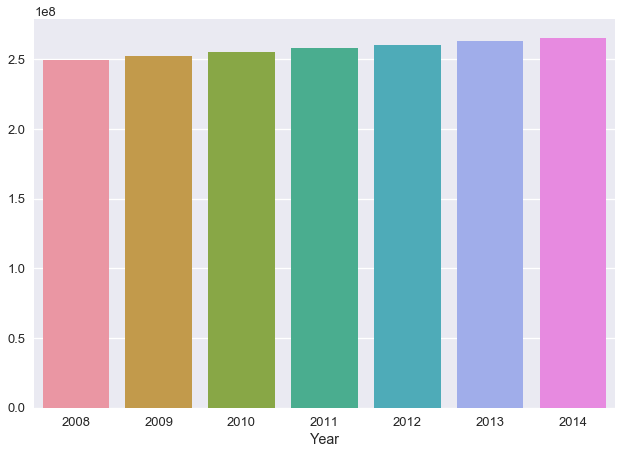

In [132]:
sns.barplot(year, total_pop)


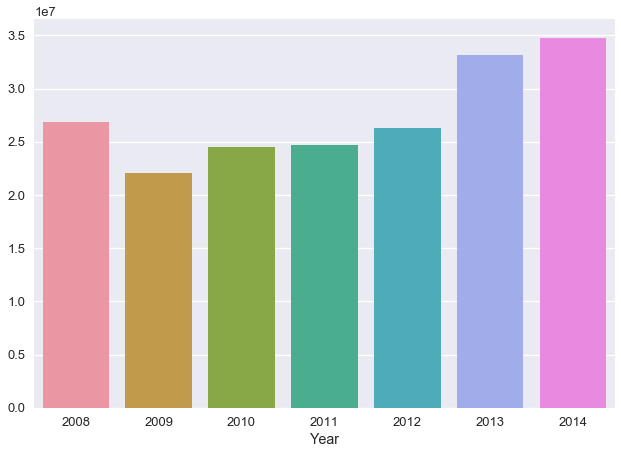

In [133]:
sns.barplot(year, atleastone)

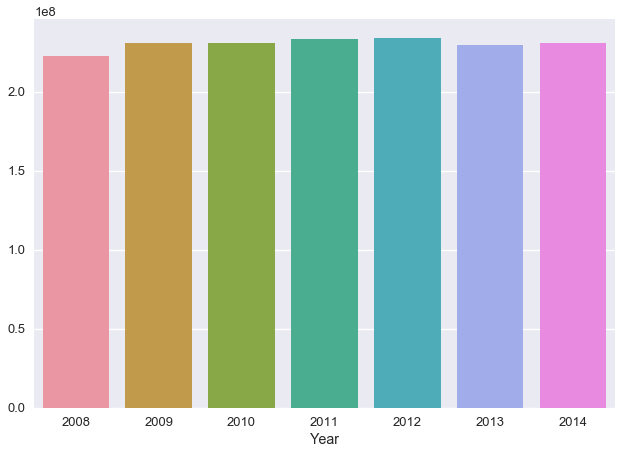

In [134]:
sns.barplot(year, zero)

In [135]:
df_hi.Id2.unique()

array([ 1003,  1015,  1043,  1049,  1051,  1055,  1069,  1073,  1077,
        1081,  1083,  1089,  1095,  1097,  1101,  1103,  1115,  1117,
        1121,  1125,  1127,  2020,  2090,  2170,  4001,  4003,  4005,
        4013,  4015,  4017,  4019,  4021,  4025,  4027,  5007,  5031,
        5045,  5051,  5069,  5085,  5119,  5125,  5131,  5143,  5145,
        6001,  6007,  6013,  6017,  6019,  6023,  6025,  6029,  6031,
        6033,  6037,  6039,  6041,  6045,  6047,  6053,  6055,  6057,
        6059,  6061,  6065,  6067,  6071,  6073,  6075,  6077,  6079,
        6081,  6083,  6085,  6087,  6089,  6095,  6097,  6099,  6101,
        6107,  6111,  6113,  6115,  8001,  8005,  8013,  8031,  8035,
        8041,  8059,  8069,  8077,  8101,  8123,  9001,  9003,  9005,
        9007,  9009,  9011,  9013,  9015, 10001, 10003, 10005, 11001,
       12001, 12005, 12009, 12011, 12015, 12017, 12019, 12021, 12023,
       12031, 12033, 12035, 12053, 12055, 12057, 12061, 12069, 12071,
       12073, 12081,

# Merge datasets by FIPS code

In [136]:
df_labor_cty = df_labor[df_labor.area_code.str.find(r'CN') != -1]

In [137]:
df_labor_cty['FIPS'] = df_labor_cty['area_code'].map(lambda x: int(x[2:7]))
df_labor_cty_yr = df_labor_cty[df_labor_cty.period == 'M13']

/Users/allandong/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [214]:
df_labor_HI = pd.merge(df_labor_cty_yr, df_hi, 
                       how='inner', 
                       left_on=['year', 'FIPS'], 
                       right_on=['Year', 'Id2'])

In [215]:
df = pd.merge(df_labor_HI, df_CDC,
             how='inner',
             left_on=['Year', 'FIPS'],
             right_on=['Year', 'County_Code'])

In [216]:
df.columns

Index(['series_id', 'year', 'period', 'unemployment_rate', 'footnote_codes',
       'area_code', 'series_title', 'area_text', 'FIPS', 'Id', 'Id2',
       'Geography', 'Est_total_pop', 'Est_1_HI_pop', 'Est_0_HI_pop', 'Year',
       'HI_ratio', 'County', 'County_Code', 'Race', 'Race_Code',
       'ICD_10_130_Infants', 'ICD_10_130_Infants_Code', 'Cause_of_death',
       'Cause_of_death_Code', 'Gender', 'Gender_Code', 'Deaths', 'Births',
       'Death_Rate'],
      dtype='object')

In [217]:
df.drop(['series_id', 'year', 'footnote_codes', 'area_code', 'series_title', 'area_text',
         'Id', 'Id2', 'Geography', 'County_Code'], axis=1, inplace=True)

In [218]:
df['Death_ratio']=df['Deaths']/df['Births']
df['HI_ratio'] = df['Est_1_HI_pop']/df['Est_total_pop']


In [ ]:
grouped = df_lr.groupby(['FIPS', 'Year']).agg({#'Est_total_pop':'first', 
                                  #'Est_1_HI_pop':'first', 
                                  #'Est_0_HI_pop':'first',
                                  'Births': 'first',
                                  'Deaths':'sum',
                                  'HI_ratio':'first',
                                  'Death_ratio':'sum',
                                  'unemployment_rate':'first'})

In [ ]:
grouped.corr()